# Problem Statement:
This project aims to develop a classification model that accurately distinguishes between malignant and benign tumours using the UCI Breast Cancer Wisconsin (Diagnostic) dataset. This dataset contains features computed from fine needle aspirate images of breast masses. By leveraging these features, the model aims to support early and reliable breast cancer diagnosis, ultimately improving patient outcomes through timely treatment.


## About the Data set:  

name: Breast Cancer Wisconsin (Diagnostic)  
data_url: https://archive.ics.uci.edu/static/public/17/data.csv  
abstract: Diagnostic Wisconsin Breast Cancer Database.  
area: Health and Medicine  
characteristics: ['Multivariate']  
num_instances: 569  
num_features: 30  

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.  

the data inspects 1-4 diferent features for each cel over 1-3 seperating planes.

## Importing necesary libraries:

In [23]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, recall_score
import warnings
warnings.filterwarnings('ignore')

# Importing and inspecting data:

In [6]:
# fetching dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data to pandas df 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
data = X.join(y)
data.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [7]:
data.nunique()

radius1               456
texture1              479
perimeter1            522
area1                 539
smoothness1           474
compactness1          537
concavity1            537
concave_points1       542
symmetry1             432
fractal_dimension1    499
radius2               540
texture2              519
perimeter2            533
area2                 528
smoothness2           547
compactness2          541
concavity2            533
concave_points2       507
symmetry2             498
fractal_dimension2    545
radius3               457
texture3              511
perimeter3            514
area3                 544
smoothness3           411
compactness3          529
concavity3            539
concave_points3       492
symmetry3             500
fractal_dimension3    535
Diagnosis               2
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

### Encoding labels:

In [9]:
data['Diagnosis'].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Exploratory Data Analysis (EDA)

We already know from earlier inspection that there arew no missing data so in the next step we will check:  
1. The distribution of the target variable
2. The distribution of our features
3. Corelations and collinearity
4. The existance of outliers

### Target variable distribution:

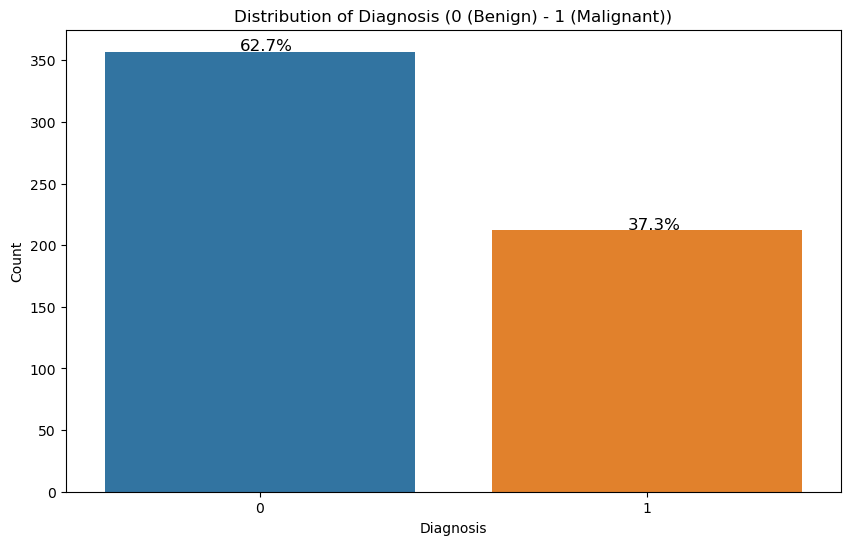

In [11]:
# Target variable distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Diagnosis', data=data)
plt.title('Distribution of Diagnosis (0 (Benign) - 1 (Malignant))')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Add percentages as labels
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 1
    ax.annotate(percentage, (x, y), size=12)


plt.show()

**Conclusion:** we can se that the data is imbalanced with only 37.3% of tumors being Malignant which is inline with our expectations.

### Distribution of features:

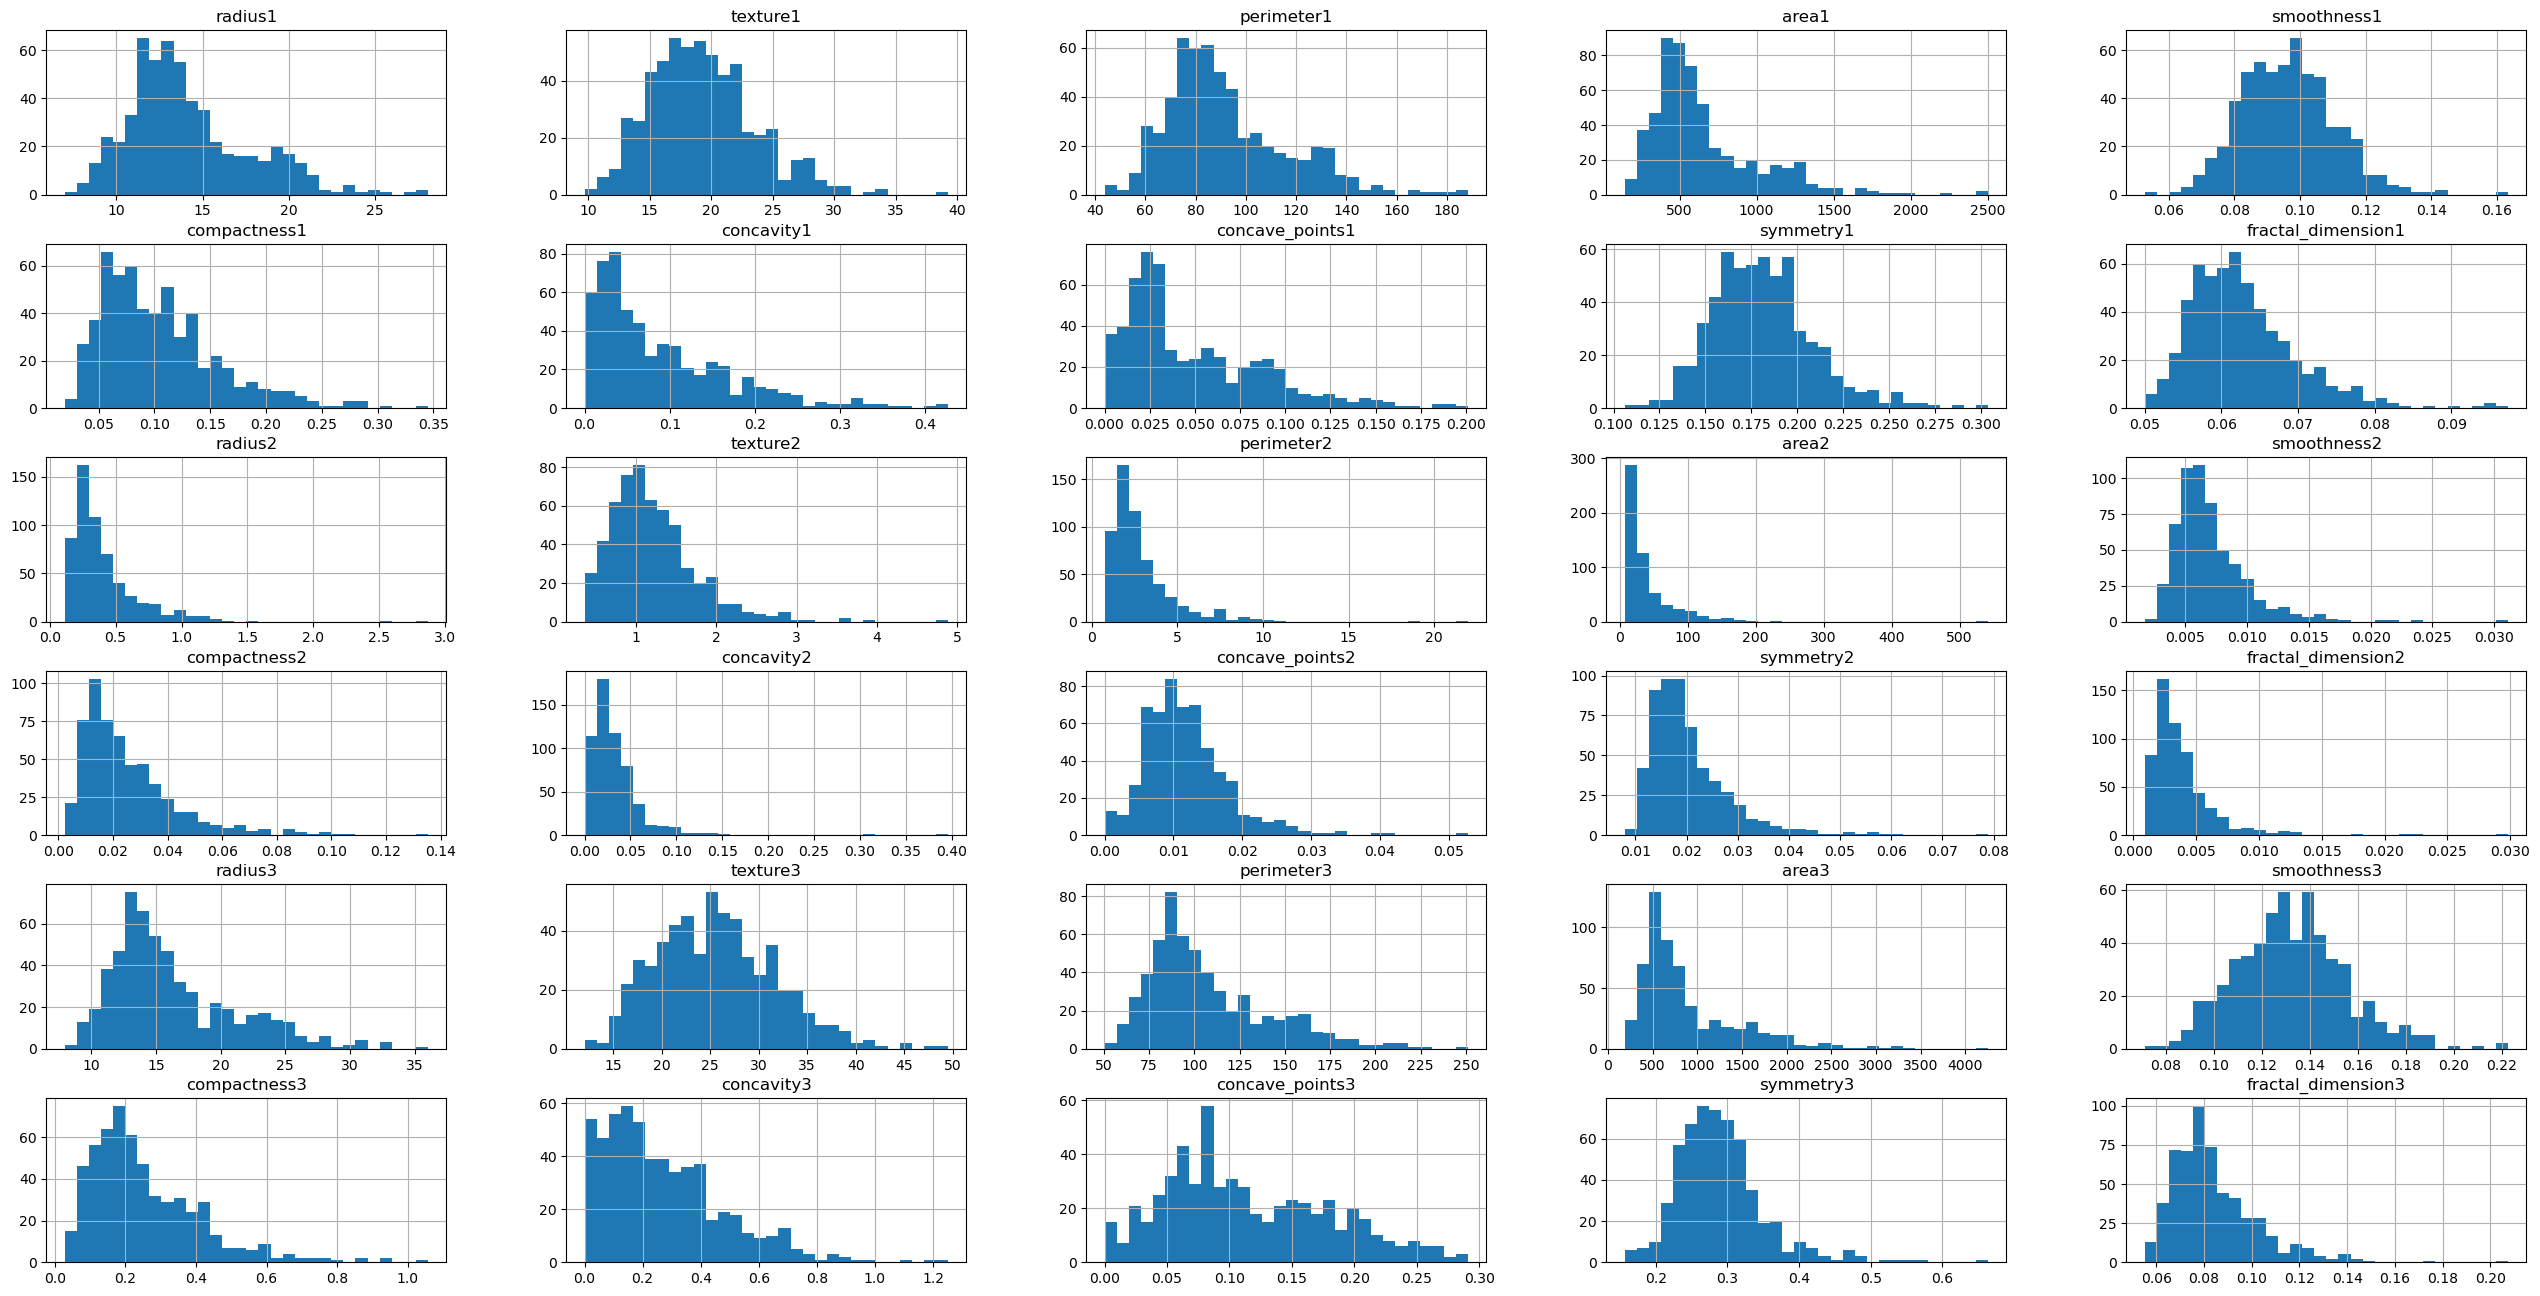

In [12]:
data_features = data.drop(columns=['Diagnosis'])
data_features.hist(bins=30, figsize=(32, 16))
plt.show()

**Conclusion:** we can see some features have very similar distributions such as radius perimiter asnd area at different planes which will be adressed in the colerations and collinearity section but so far nothing else is out of norms.

### Corellation and collinearity:

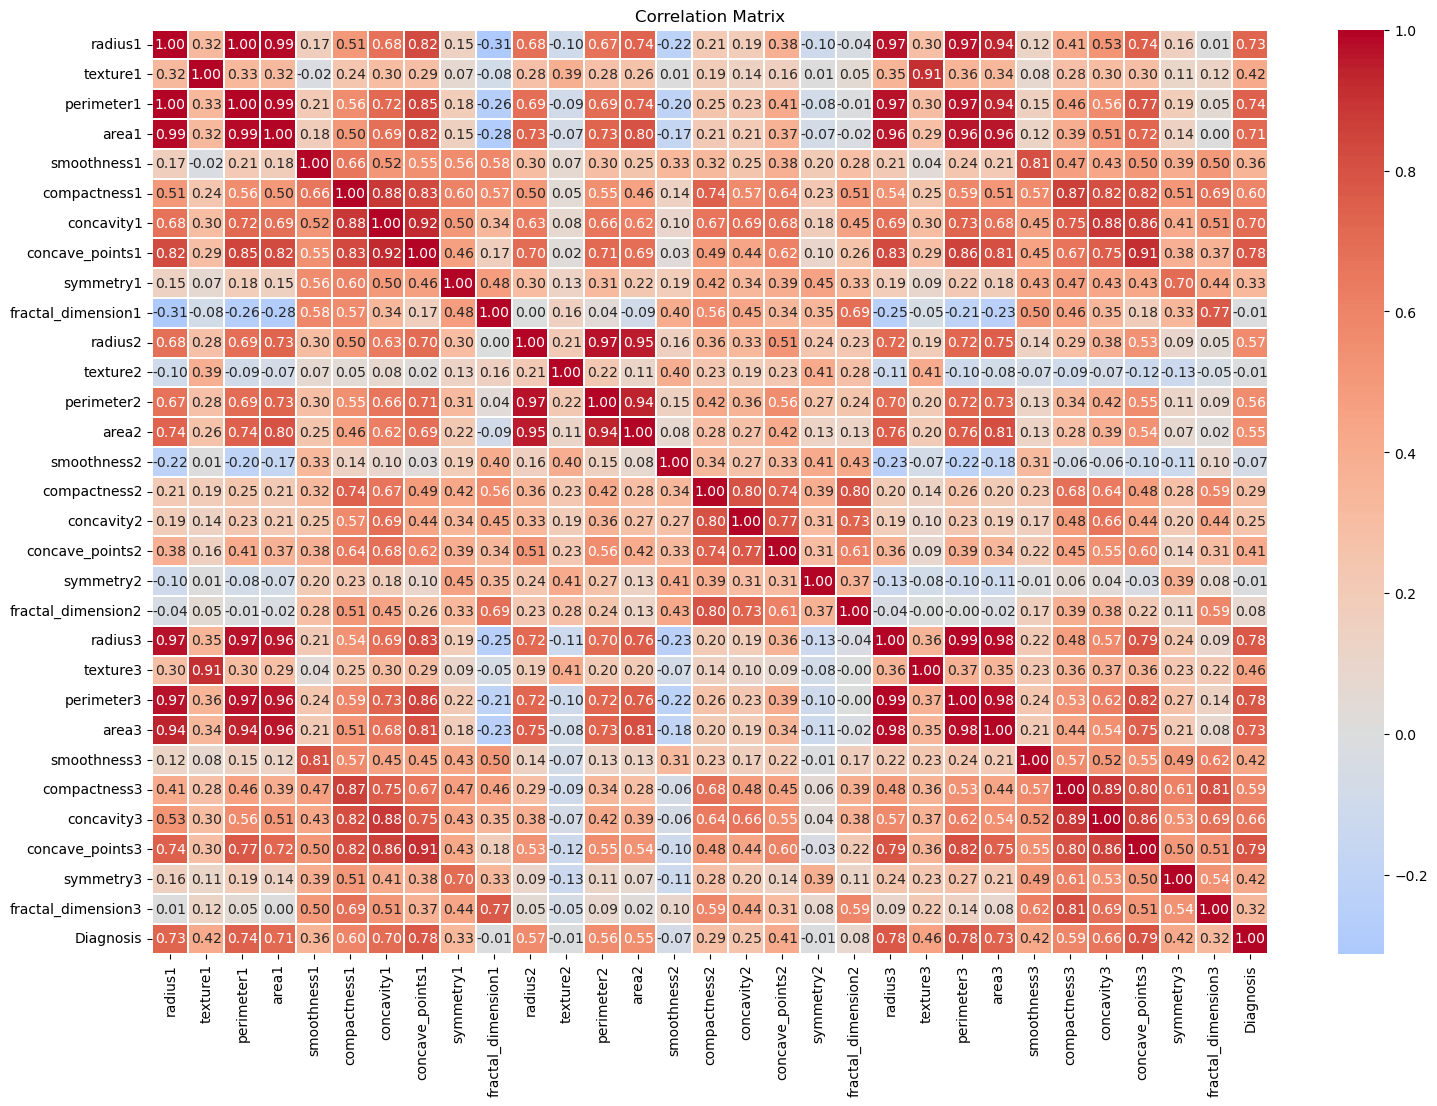

In [13]:
# Visualize the correlation matrix
plt.figure(figsize=(18, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True,center=0, cmap='coolwarm', linewidths=0.2, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Inspecting the High Corelations**

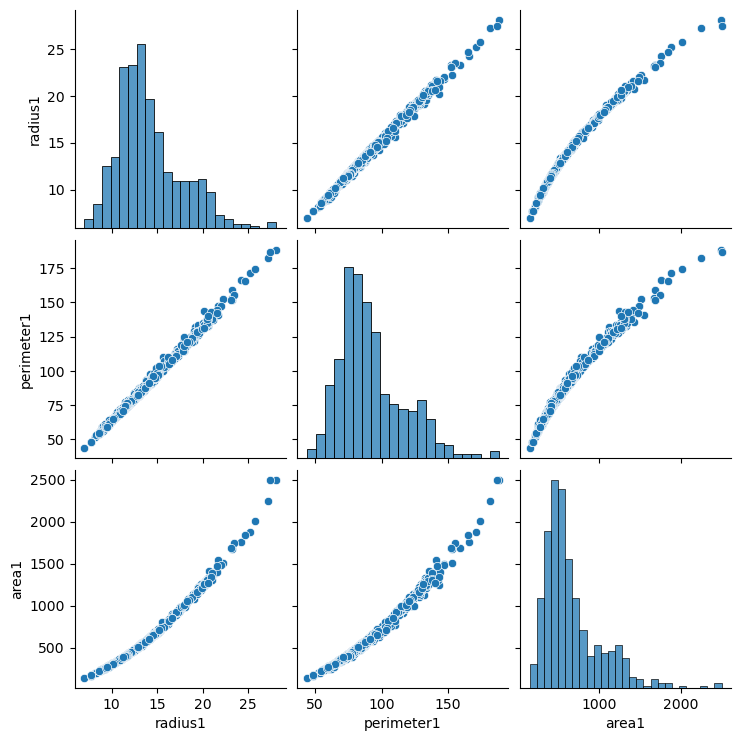

In [14]:
sns.pairplot(data, vars=['radius1', 'perimeter1', 'area1'])
plt.show()

**The High Collinearity between radius perimiter and area makes sense since:**  
area1 = pi * (radius1) ^ 2  
perimeter1 = 2 * pi * radius1  
  
So Perimeter is a linear transformation of radius and area is a quadratic transformation of radius.  
That contributes to the high multi-collinearity here 
  
**Conclusion:**  
I will drop the area and peremiters and keep the radius

In [15]:
data = data.drop(columns=['perimeter1', 'area1', 'perimeter2', 'area2', 'perimeter3', 'area3'])

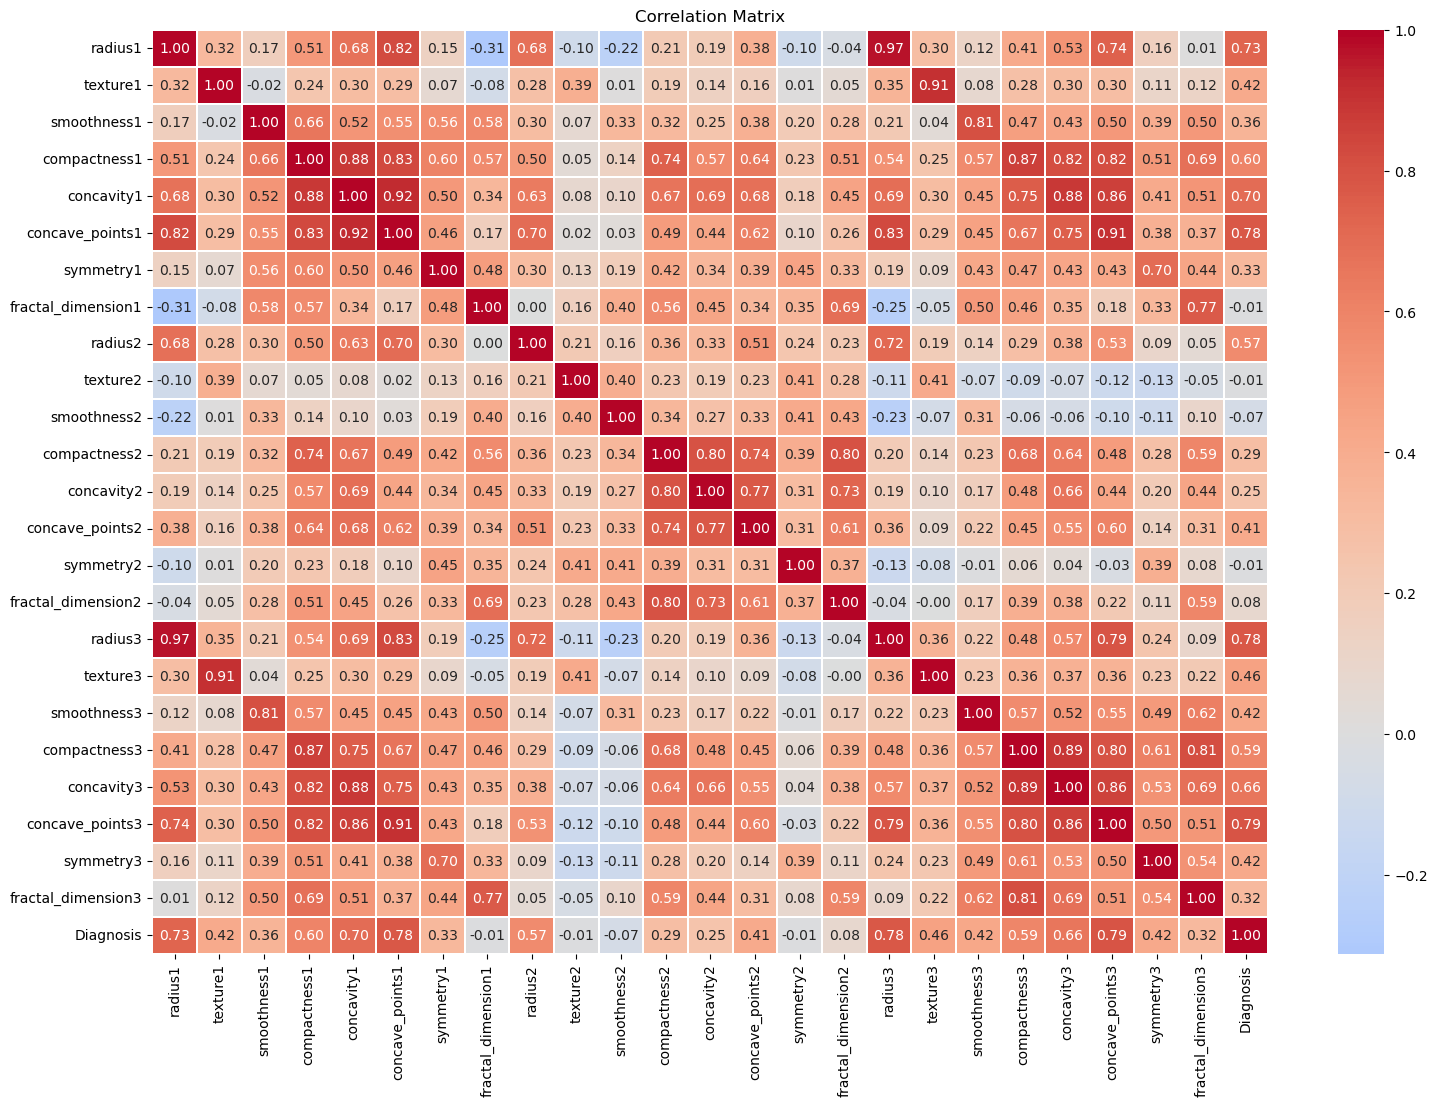

In [16]:
# Re-Visualize the correlation matrix after dropping the columns
plt.figure(figsize=(18, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True,center=0, cmap='coolwarm', linewidths=0.2, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Conclusion:**  
some corellation still exists between plane 1 and plane 3 for example and different types of concavities, but due to my lack of domain knowledge in that area instead of dropping some of them I will handel this issue by performing either feature selection through regularization or using a robust training method that can handel corelated features such as Tree-based methods

### Boxplots of features:

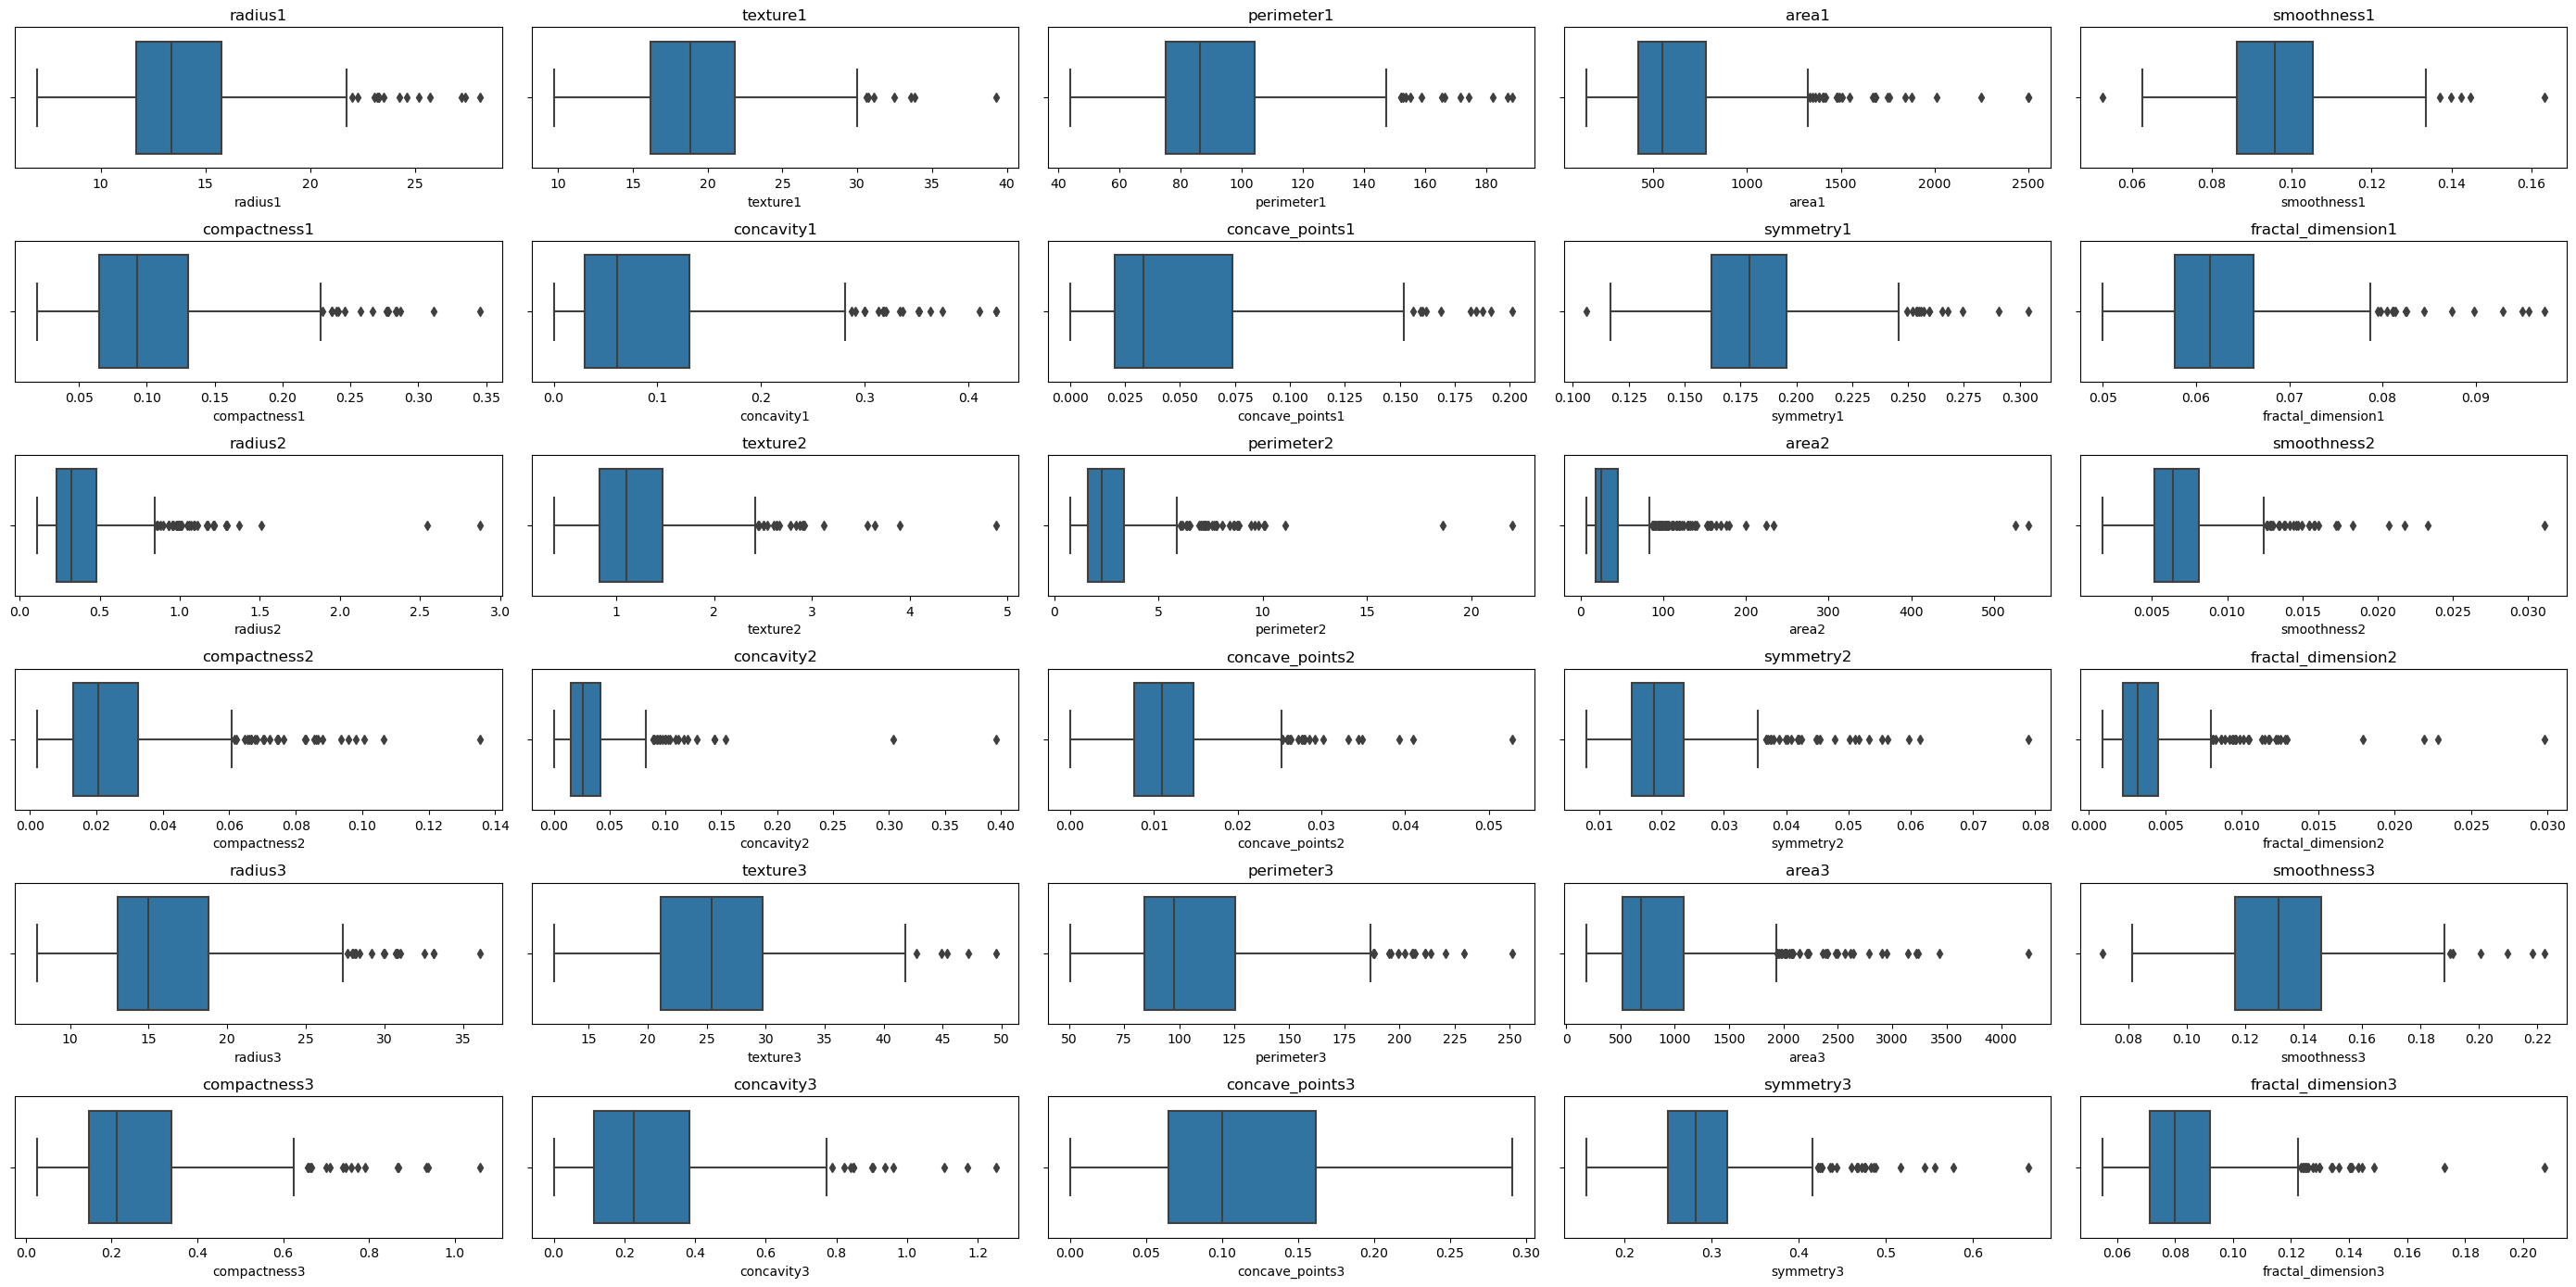

In [17]:
plt.figure(figsize=(28, 14))
for i, col in enumerate(data_features.columns):
    plt.subplot(6, 5, i+1)
    sns.boxplot(x=data_features[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [18]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers for each column
outliers = {}
for column in data.columns:
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]

# Print number of outliers for each column and how many of them fall under each label
for column, outlier_values in outliers.items():
    num_outliers = len(outlier_values)
    num_malignant = len(outlier_values[data['Diagnosis'] == 1])
    num_benign = len(outlier_values[data['Diagnosis'] == 0])
    print(f"Number of outliers in {column}: {num_outliers} (Malignant: {num_malignant}, Benign: {num_benign})")



Number of outliers in radius1: 14 (Malignant: 14, Benign: 0)
Number of outliers in texture1: 7 (Malignant: 5, Benign: 2)
Number of outliers in smoothness1: 6 (Malignant: 3, Benign: 3)
Number of outliers in compactness1: 16 (Malignant: 16, Benign: 0)
Number of outliers in concavity1: 18 (Malignant: 15, Benign: 3)
Number of outliers in concave_points1: 10 (Malignant: 10, Benign: 0)
Number of outliers in symmetry1: 15 (Malignant: 9, Benign: 6)
Number of outliers in fractal_dimension1: 15 (Malignant: 5, Benign: 10)
Number of outliers in radius2: 38 (Malignant: 37, Benign: 1)
Number of outliers in texture2: 20 (Malignant: 6, Benign: 14)
Number of outliers in smoothness2: 30 (Malignant: 4, Benign: 26)
Number of outliers in compactness2: 28 (Malignant: 14, Benign: 14)
Number of outliers in concavity2: 22 (Malignant: 10, Benign: 12)
Number of outliers in concave_points2: 19 (Malignant: 12, Benign: 7)
Number of outliers in symmetry2: 27 (Malignant: 16, Benign: 11)
Number of outliers in fractal_

**Conclusion**  
There is a moderate ammount of outliers here in the (5-10%) range that are distributed differently among labels for different features, so instead of dropping them I'm electing to use a learning methopd that's robust against outliers such as ensemble trees or Linear Regression with huber loss and L2 regulization.

### EDA Conclusions:

1. we can se that the data is imbalanced with only 37.3% of tumors being Malignant which is inline with our expectations.
2. we can see some features have very similar distributions such as radius perimiter asnd area at different planes which will be adressed in the colerations and collinearity section but so far nothing else is out of norms.
3. we droped the area and peremiters and kept the radius to rerduce multicollinearity
4. some corellation still exists between plane 1 and plane 3 for example and different types of concavities, but due to my lack of domain knowledge in that area instead of dropping some of them I will handel this issue by performing either feature selection through regularization or using a robust training method that can handel corelated features such as Tree-based methods
5. There is a moderate ammount of outliers here in the (5-10%) range that are distributed differently among labels for different features, so instead of dropping them I'm electing to use a learning methopd that's robust against outliers such as ensemble trees or Linear Regression with huber loss and L2 regulization.

# Model Selection:

**Based on the Results of Our EDA we have a data set with the following properties:**  
1. Moderate sized data set with ~600 instances and 24 features after dropping 6.
2. Moderate ammount of outliers
3. Multi-Collinearity
4. All features are Contineous with no missing data

## Best Options for Models and why:

### Random Forest:  
  
Random forest is an Ensembel algorithm that's robust to both outliers and MultiCollinearity due to:  
1. Bagging: sampeling the data with replacement (bootstrapping) and building multiple trees and taking a vote for the best answer (aggregating).
2. Sampling Features: it builds each tree with only a subset of features increasing its robustness aginst overfitting since it is averaging trees that have higher varience and not dominated by a couple of features.

### Linear Regression with feature scaling and Regularization and Huber-loss:  
  
Due to our moderate number of features and Regularization and huber-loss handelling the outliers and multicollinearity problems.

# Random Forest:

In [19]:
# Split the data into training and testing sets
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Hyperparameter Tuning:

In [20]:
# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning with F1-score
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3, scoring='f1')
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters for Random Forest: {best_params}")
print(f"Best cross-validation F1-score: {best_score}")

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best cross-validation F1-score: 0.9488099986703894


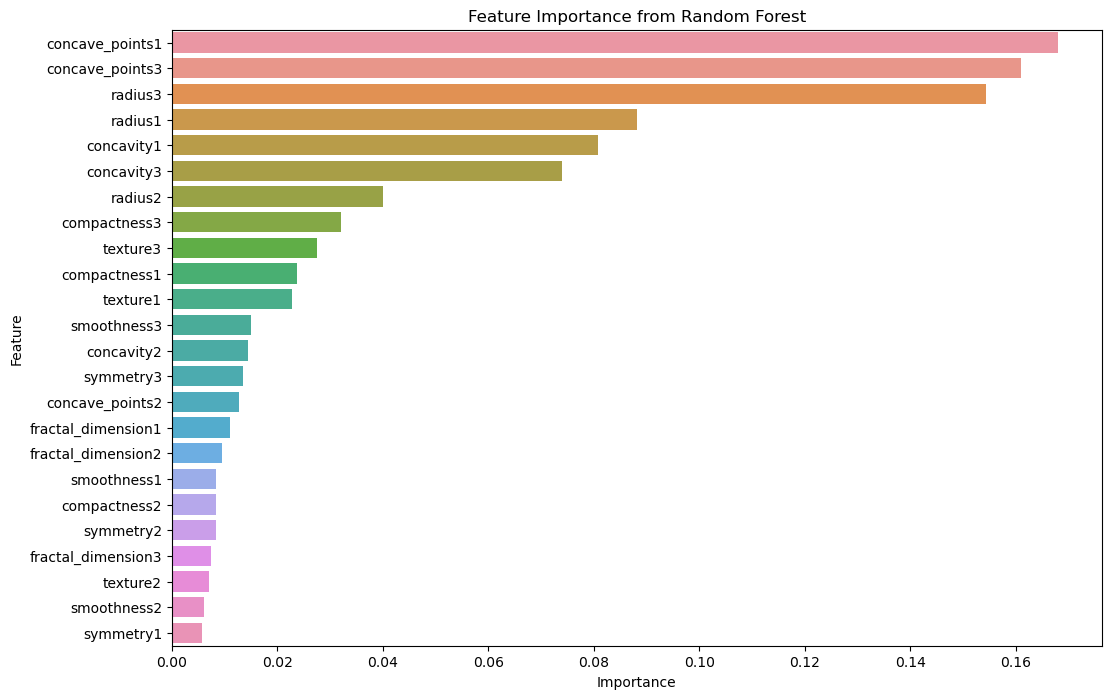

In [24]:
# Assuming 'random_forest' is your trained Random Forest classifier and 'X_train' is your training data
# Get feature importances
feature_importances = grid_search.best_estimator_.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Results and Analysis:

### Recall and F1-Score:

In [26]:
# Train the Random Forest model with the best parameters
best_random_forest = grid_search.best_estimator_
y_pred_best_rf = best_random_forest.predict(X_test)

# Calculate performance metrics
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)
recall_test = recall_score(y_test, y_pred_best_rf)
confusion_matrix_test = confusion_matrix(y_test, y_pred_best_rf)
# Calculate performance metrics for training set
y_train_pred_best_rf = best_random_forest.predict(X_train)
accuracy_train_best_rf = accuracy_score(y_train, y_train_pred_best_rf)
f1_train_best_rf = f1_score(y_train, y_train_pred_best_rf)
recall_train = recall_score(y_train, y_train_pred_best_rf)
confusion_matrix_train = confusion_matrix(y_train, y_train_pred_best_rf)

# Print train set metric
print("Training Set Metrics:\n")
print(f"Random Forest Training Accuracy: {accuracy_train_best_rf}")
print(f"Random Forest Training F1-Score: {f1_train_best_rf}")
print(f"Random Forest Training Recall: {recall_train}\n\n")

# Print test set metrics
print("Test Set Metrics\n")
print(f"Random Forest Test Accuracy: {accuracy_best_rf}")
print(f"Random Forest Test F1-Score: {f1_best_rf}")
print(f"Random Forest Test Recall: {recall_test}")


Training Set Metrics:

Random Forest Training Accuracy: 1.0
Random Forest Training F1-Score: 1.0
Random Forest Training Recall: 1.0


Test Set Metrics

Random Forest Test Accuracy: 0.9649122807017544
Random Forest Test F1-Score: 0.9523809523809524
Random Forest Test Recall: 0.9302325581395349


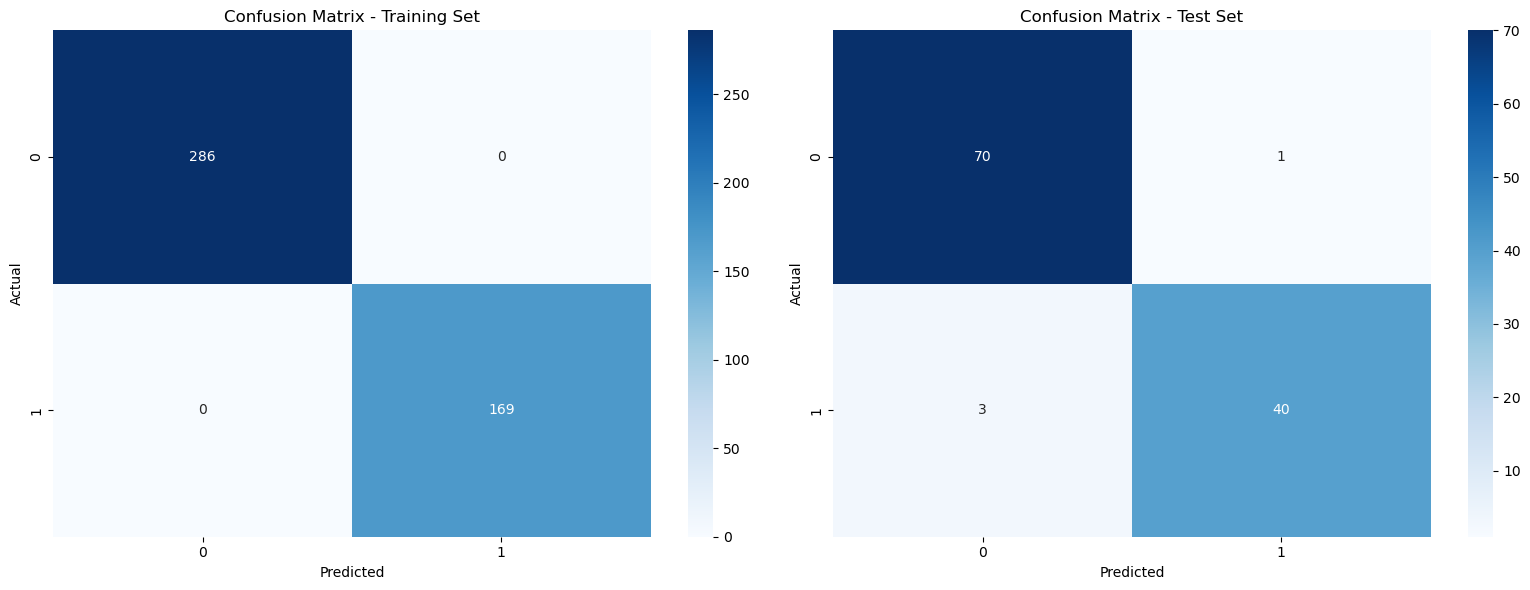

In [27]:
# Plot confusion matrices side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Confusion matrix for the training set
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Training Set')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion matrix for the test set
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Test Set')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### ROC Score:

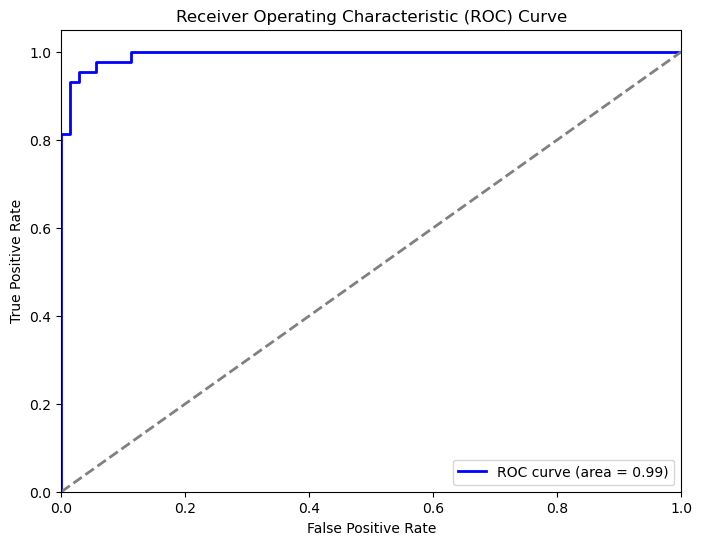

ROC AUC Score: 0.9937766131673764


In [28]:
# Plot ROC curve and calculate ROC AUC score
y_test_prob_best_rf = best_random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob_best_rf)
roc_auc = roc_auc_score(y_test, y_test_prob_best_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"ROC AUC Score: {roc_auc}")

# Conclusion


### Learnings and Takeaways
- **Handling Multicollinearity**  
We observed high multicollinearity between the radius, perimeter, and area features. This makes sense because the perimeter is a linear transformation of the radius, and the area is a quadratic transformation of the radius. To address this, we decided to drop the perimeter and area features and keep the radius. This step helped in reducing multicollinearity, leading to more stable and interpretable models.  
  
- **Model Evaluation Metrics**  
Choosing the right evaluation metrics is crucial for assessing model performance. For cancer detection, recall (sensitivity) and F1 score are particularly important. Recall ensures that most actual cancer cases are detected, minimizing false negatives. The F1 score provides a balance between precision and recall, which is useful when both false positives and false negatives are important. In our project, focusing on these metrics helped us better understand the trade-offs and effectiveness of our models.

### Potential Improvement
- **Hyperparameter Tuning**: While we performed some hyperparameter tuning using GridSearchCV, further tuning with a more extensive parameter grid or using techniques like RandomizedSearchCV could potentially improve model performance.
- **Feature Engineering**: Additional feature engineering, such as creating interaction terms or polynomial features, could help capture more complex relationships in the data and improve model accuracy, but might require some domain Knowledge.
- **Ensemble Methods**: Exploring other ensemble methods, such as Gradient Boosting Machines (GBM) or stacking multiple models, could enhance the robustness and accuracy of our predictions.
- **Using Multiple Models and comparing results**

# Git Hub Repo Link:  
  
https://github.com/alimonds790/Cancer_Tumor_Classification/

# References:

1. Wolberg, W., Mangasarian, O., Street, N., & Street, W. (1993). Breast Cancer Wisconsin (Diagnostic) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.
2. Koehrsen, W. (2019, December 10). Hyperparameter Tuning the random Forest in Python - TDS Archive - Medium. Medium. https://medium.com/towards-data-science/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74